In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def imageStitching(imgName1, imgName2):
    # Loading the image1
    img1 = cv2.imread(imgName1)
    # Converting image to grayscale
    gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    image1_color = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    # f, axis_array = plt.subplots(1,2, figsize=(15,10))
    # axis_array[0].imshow(image1_color)
    # axis_array[1].imshow(gray1, cmap='gray')

    img2 = cv2.imread(imgName2)
    # Converting image to grayscale
    gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    image2_color = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    f, axis_array = plt.subplots(1,2, figsize=(15,10))
    axis_array[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    axis_array[1].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    # axis_array[0].imshow(gray1, cmap='gray')
    # axis_array[1].imshow(gray2, cmap='gray')

    # Initialize SIFT detector
    sift = cv2.SIFT_create()
    # Detect key points and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # create BFMatcher object
    bf = cv2.BFMatcher()
    # Match descriptors.
    matches = bf.match(descriptors1,descriptors2)

    # sort the matches based on distance
    matches = sorted(matches, key=lambda val: val.distance)
    matches = matches[:200]

    kp1 = np.float32([kp.pt for kp in keypoints1])
    kp2 = np.float32([kp.pt for kp in keypoints2])
    pts1 = np.float32([kp1[m.queryIdx] for m in matches])
    pts2 = np.float32([kp2[m.trainIdx] for m in matches])

    # estimate the homography between the sets of points
    (H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    print("img1 shape = ", np.shape(img1), ",img2 shape = ", np.shape(img2))
    result = cv2.warpPerspective(img1, H, (w1+w2, h1+h2))
    result[0:h2, 0:w2] = img2

    return result



In [11]:
def plot_img(img, size=(7,7), title=""):
    cmap = "gray" if len(img.shape) == 2 else None
    plt.figure(figsize=size)
    plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

img1 shape =  (691, 961, 3) ,img2 shape =  (662, 997, 3)


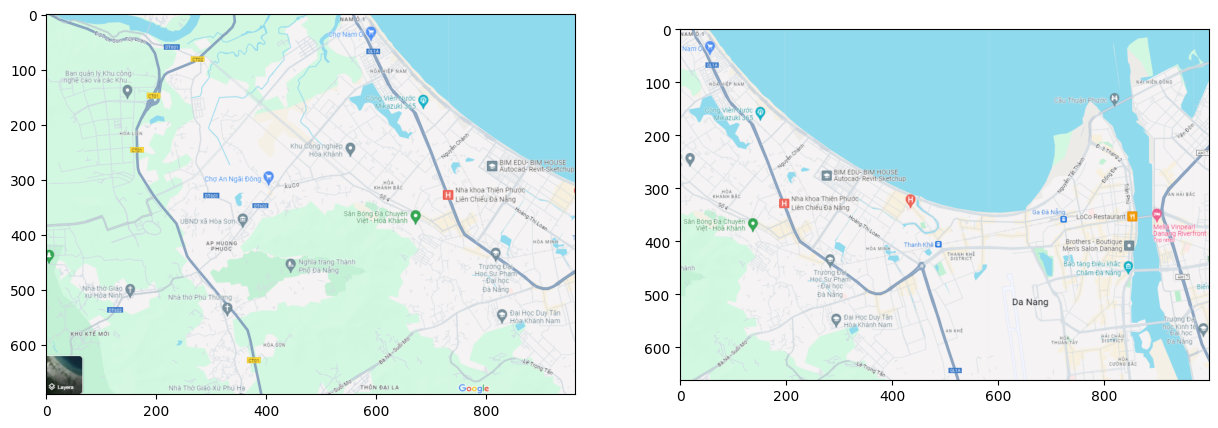

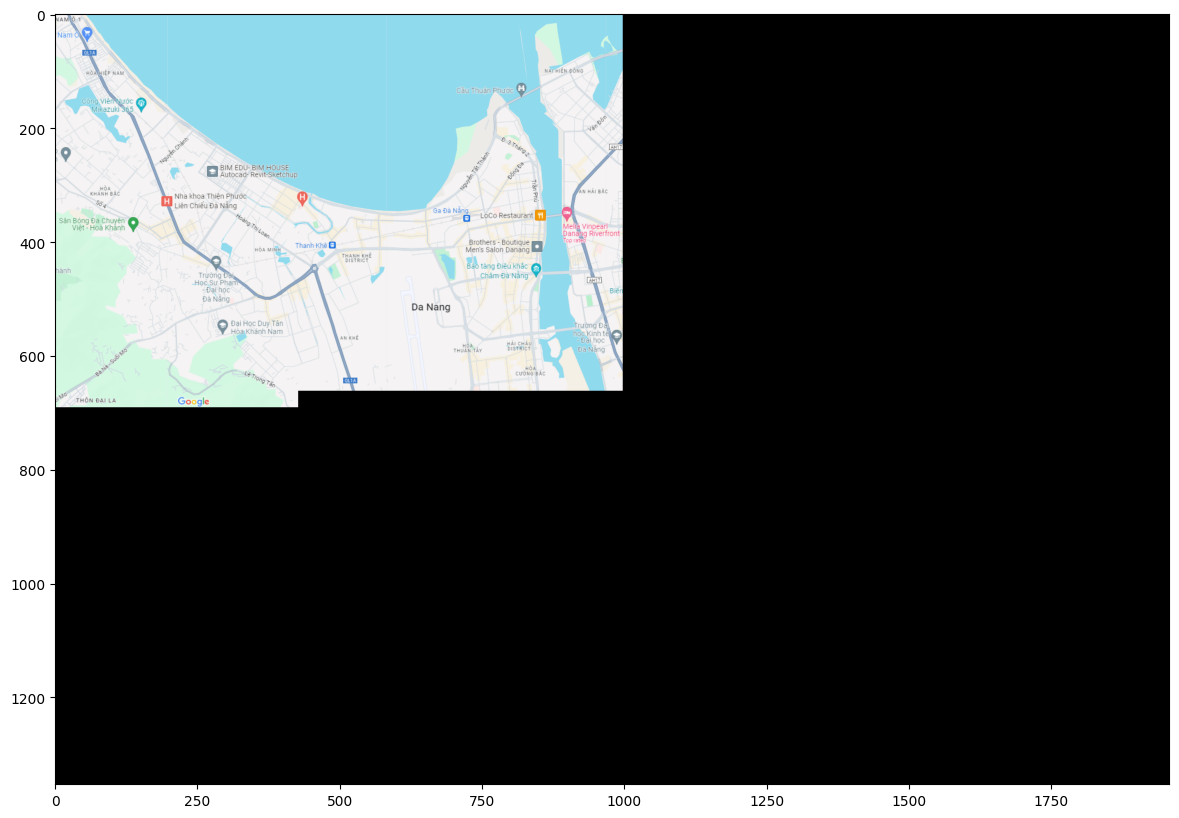

In [12]:
result = imageStitching('map1.png', 'map2.png')
# cv2.imwrite('temp.jpg', result)
result_color = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plot_img(result_color, size=(20,10))